# __ top

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# __ pip

In [1]:
pip install -U scikit-image

     |████████████████████████████████| 29.2MB 145kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scikit-image 0.16.2
    Uninstalling scikit-image-0.16.2:
      Successfully uninstalled scikit-image-0.16.2


#[] PROBLEM STATEMENT []

Assignment

Task: To create a Vanilla CNN for MNIST Handwritten Digit Classification.

Dataset : THE MNIST DATABASE of handwritten digit http://yann.lecun.com/exdb/mnist/

Data Augmentation : Perform data augmentation to increase the dataset size. eg:

● Shift (Left, Right, Top, Down)

● Flip

● Rotate

Network Architecture : Vanilla CNN

● Layer 1: Convolution

● Layer 2: BatchNormalization

● Layer 3: Dense

Hyperparameter Tuning : Perform Hyperparameter tuning for optimal results. eg:

● No of units for each layer

● Adjust the learning rate

● Choose optimizer & loss function

● Batch size & number of epochs

Note : You have to print the classification report for the above task.

Reference Links : http://yann.lecun.com/exdb/mnist/ https://nanonets.com/blog/data-augmentation-how-to-use-deep-learning-when-you-have-limited-data-part-2/

# [] IMPORTS []

In [2]:
import math
import os
import random
import datetime
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# [] DATASET LOAD []

Dataset : THE MNIST DATABASE of handwritten digit http://yann.lecun.com/exdb/mnist/

In [3]:
DATA_DIR = '/content/drive/MyDrive/Colab Notebooks/DL/CS551_Assignment_4/data' #<----------- following 4 files must be present in this dir
DATA_FILE_TRAIN_IMAGE =   os.path.join(DATA_DIR, 'train-images.idx3-ubyte')
DATA_FILE_TRAIN_LABEL =   os.path.join(DATA_DIR, 'train-labels.idx1-ubyte')
DATA_FILE_TEST_IMAGE =    os.path.join(DATA_DIR, 't10k-images.idx3-ubyte')
DATA_FILE_TEST_LABEL =    os.path.join(DATA_DIR, 't10k-labels.idx1-ubyte')

#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# Load Training Images
def _mnist_images(IMAGE_FILE):
  print('> Reading Images from',IMAGE_FILE )
  _FILE_IMAGE = open(IMAGE_FILE,"rb" ) 

  # first 4 byte = magic number
  _magic = int.from_bytes(_FILE_IMAGE.read(4), "big")
  print('Magic Number\t',_magic)

  # next 4 byte = nos items
  _nos_images = int.from_bytes(_FILE_IMAGE.read(4), "big")
  print('Nos Images\t',_nos_images)

  # next 4 byte = image dimension Rows
  _nos_rows= int.from_bytes(_FILE_IMAGE.read(4), "big")
  print('Nos Rows\t',_nos_rows)

  # next 4 byte = image dimension Cols
  _nos_cols = int.from_bytes(_FILE_IMAGE.read(4), "big")
  print('Nos Cols\t',_nos_cols)

  _nos_bytes = _nos_rows*_nos_cols
  print('Bytes per Image\t',_nos_bytes)

  # next onwards.... one image per _nos_bytes bytes
  _buffer = np.frombuffer(_FILE_IMAGE.read(_nos_bytes*_nos_images), 
                          dtype=np.uint8, count=_nos_bytes*_nos_images, offset=0)
  print('ImageBuffer:',_buffer.dtype, _buffer.shape)
  _buffer = _buffer.reshape(_nos_images,_nos_rows,_nos_cols)
  print('ImageBuffer Reshaped:',_buffer.dtype, _buffer.shape)

  _FILE_IMAGE.close()
  print('Done\n' )
  return _buffer, _nos_images, _nos_rows, _nos_cols
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
def _mnist_labels(LABEL_FILE):
  print('> Reading Labels from',LABEL_FILE )
  _FILE_LABEL = open(LABEL_FILE,"rb" ) 

  # first 4 byte = magic number
  _magic = int.from_bytes(_FILE_LABEL.read(4), "big")
  print('Magic Number\t',_magic)

  # next 4 byte = nos items
  _nos_labels = int.from_bytes(_FILE_LABEL.read(4), "big")
  print('Nos Labels\t',_nos_labels)

  # next onwards.... one image per _nos_bytes bytes
  _buffer = np.frombuffer(_FILE_LABEL.read(_nos_labels), 
                          dtype=np.uint8, count=_nos_labels, offset=0)
  print('LabelBuffer:',_buffer.dtype, _buffer.shape)

  _FILE_LABEL.close()
  print('Done\n' )
  return _buffer, _nos_labels
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

train_x, nos_train_x, dimH_train_x, dimW_train_x = _mnist_images(DATA_FILE_TRAIN_IMAGE)
train_y, nos_train_y = _mnist_labels(DATA_FILE_TRAIN_LABEL)

test_x, nos_test_x, dimH_test_x, dimW_test_x = _mnist_images(DATA_FILE_TEST_IMAGE)
test_y, nos_test_y = _mnist_labels(DATA_FILE_TEST_LABEL)
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


> Reading Images from /content/drive/MyDrive/Colab Notebooks/DL/CS551_Assignment_4/data/train-images.idx3-ubyte
Magic Number	 2051
Nos Images	 60000
Nos Rows	 28
Nos Cols	 28
Bytes per Image	 784
ImageBuffer: uint8 (47040000,)
ImageBuffer Reshaped: uint8 (60000, 28, 28)
Done

> Reading Labels from /content/drive/MyDrive/Colab Notebooks/DL/CS551_Assignment_4/data/train-labels.idx1-ubyte
Magic Number	 2049
Nos Labels	 60000
LabelBuffer: uint8 (60000,)
Done

> Reading Images from /content/drive/MyDrive/Colab Notebooks/DL/CS551_Assignment_4/data/t10k-images.idx3-ubyte
Magic Number	 2051
Nos Images	 10000
Nos Rows	 28
Nos Cols	 28
Bytes per Image	 784
ImageBuffer: uint8 (7840000,)
ImageBuffer Reshaped: uint8 (10000, 28, 28)
Done

> Reading Labels from /content/drive/MyDrive/Colab Notebooks/DL/CS551_Assignment_4/data/t10k-labels.idx1-ubyte
Magic Number	 2049
Nos Labels	 10000
LabelBuffer: uint8 (10000,)
Done



# [] DATASET AUGUMENT []

Data Augmentation : Perform data augmentation to increase the dataset size. eg:

● Shift (Left, Right, Top, Down)

● Flip

● Rotate

In [4]:
# flips horizontal and vertical
def _aug_flip(imageA, horz=True, vert=True):
  res = imageA
  if vert:
    res = np.flip(res,1)
  if horz:
    res = np.flip(res,2)
  return res

def _aug_shift(imageA, shiftA):
  imageT = []
  for i in range(0, len(imageA)):
    imageT.append(np.roll(np.roll(imageA[i], shiftA[i,0],axis=0),shiftA[i,1],axis=1))
  return imageT

def _aug_rotate(imageA, radA, opx, opy):
  imageT = [] #<<--- appending to list is faster than vstacking
  cpx,cpy = int(opx/2), int(opy/2)
  for i in range(0, len(imageA)):
    imageT.append(transform.warp(imageA[i],
                                       transform.AffineTransform(matrix= _get_rotation_matrix_wrtp(radA[i], cpx,cpy)), 
                                       output_shape=(opx, opy)))
  return imageT

# tranformation matrices for translation and rotation 
def _get_translation_matrix(tX,tY):
  return np.array([[1,0,tX],[0,1,tY],[0,0,1]])

def _get_rotation_matrix_wrtc(tH):
  return np.array([[math.cos(tH), -math.sin(tH),  0],
                   [math.sin(tH), math.cos(tH),   0],
                   [0,            0,              1]])
  
def _get_rotation_matrix_wrtp(tH, tX, tY):
  # rotation wrt to a point = translate to center - rotate - translate back to poit
  t1 = _get_translation_matrix(-tX, -tY)
  tr = _get_rotation_matrix_wrtc(tH)
  t2 = _get_translation_matrix(tX, tY)
  return np.matmul(t2, np.matmul(tr,t1))
  

## __ apply augmentation

### FLIP

In [5]:
# > flipping images > for each image, flip in 3 diff ways

train_x_flipH = _aug_flip(train_x, horz=True, vert=False) # horizontal flip
train_x_flipV = _aug_flip(train_x, horz=False, vert=True) # verical flip
train_x_flipD = _aug_flip(train_x, horz=True, vert=True) # horizontal + vertical flip

test_x_flipH = _aug_flip(test_x, horz=True, vert=False) # horizontal flip
test_x_flipV = _aug_flip(test_x, horz=False, vert=True) # verical flip
test_x_flipD = _aug_flip(test_x, horz=True, vert=True) # horizontal + vertical flip

### ROTATE

In [6]:
# > rotating images > for each image, rotate by random angle b/w -180 to 180

rand_ang_train = math.pi*(np.random.random(size=nos_train_x)*2 - 1) # random scaled b/w -180 to 180
train_x_rotR = np.array(_aug_rotate(train_x,  rand_ang_train, dimH_train_x, dimW_train_x))

rand_ang_test = math.pi*(np.random.random(size=nos_test_x)*2 - 1) # random scaled b/w -180 to 180
test_x_rotR = np.array(_aug_rotate(test_x,  rand_ang_test, dimH_test_x, dimW_test_x))

### SHIFT

In [7]:
# > shift images > for each image, shift by random amount +/- 5 in either directions

rand_delta_train = (10*(np.random.random(size=(nos_train_x,2))*2 - 1)).astype('int')
train_x_shift = np.array(_aug_shift(train_x,  rand_delta_train))

rand_delta_test = (10*(np.random.random(size=(nos_test_x,2))*2 - 1)).astype('int')
test_x_shift = np.array(_aug_shift(test_x,  rand_delta_test))

## __ view augmentation

48992 / 60000 	Label: 7


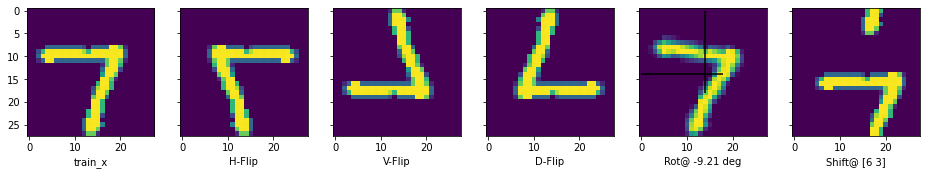

In [8]:
# plot random digit
di=random.randint(0,nos_train_x-1)
print(di,'/',nos_train_x, '\tLabel:', train_y[di])
fig,ax = plt.subplots(1,6, figsize=(16,6), sharey=True)

ax[0].imshow(train_x[di])
ax[0].set_xlabel('train_x')

ax[1].imshow(train_x_flipH[di])
ax[1].set_xlabel('H-Flip')

ax[2].imshow(train_x_flipV[di])
ax[2].set_xlabel('V-Flip')

ax[3].imshow(train_x_flipD[di]) 
ax[3].set_xlabel('D-Flip')

ax[4].imshow(train_x_rotR[di])
ax[4].vlines(14, 0, 18)
ax[4].hlines(14, 0, 18)
ax[4].set_xlabel('Rot@ '+str(round(rand_ang_train[di]*180/math.pi,2))+ ' deg')

ax[5].imshow(train_x_shift[di]) 
ax[5].set_xlabel('Shift@ '+str(rand_delta_train[di]))


plt.show()